In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# 분류 NN
from sklearn.neural_network import MLPClassifier

# SVM 
from sklearn.svm import SVC

# KNN
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns

In [2]:
df_raw = pd.read_csv("/home/piai/문서/빅데이터분석실습/2. Big Data 분석/유방암.csv",encoding = 'euc-kr')
df_raw.head() # 데이터 불러오기

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [3]:
df_raw['diagnosis'] = df_raw['diagnosis'].replace('음성',0)
df_raw['diagnosis'] = df_raw['diagnosis'].replace('양성',1)
df_raw = pd.get_dummies(df_raw,drop_first = True)
df_raw.head() 
# diganosis 범주형 변수로 변환

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [4]:
df_raw.isnull().sum(axis = 0) # 결측치 이상 없음

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [5]:
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"]

display("설명변수:", df_raw_x.head())
display("목표변수:", df_raw_y.head())
# 설명변수와 목표변수로 데이터 나누기

'설명변수:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


'목표변수:'

0    0
1    1
2    0
3    1
4    1
Name: diagnosis, dtype: int64

In [8]:
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")
v_feature_names = df_raw_x_num.columns

scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns = v_feature_names)
display("Dummy 변환 전:", df_raw_x_num.head())
display("Dummy 변환 후:", df_x_scaled.head())
# 연속형 설명변수 scaling 변환

'Dummy 변환 전:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


'Dummy 변환 후:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [9]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_scaled, df_raw_y, test_size = 0.4, random_state = 2023)

print("분할 전 설명변수 데이터:", df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train", df_train_x.shape," Test", df_test_x.shape)
# test와 train를 0.4:0.6 비율로 나눔

분할 전 설명변수 데이터: (320, 30)
분할 후 설명변수 데이터 : Train (192, 30)  Test (128, 30)


In [10]:
knn_uncust = KNeighborsClassifier()
knn_uncust.fit(df_train_x,df_train_y)
print('Accuracy on training set: {:.3f}',format(knn_uncust.score(df_train_x,df_train_y)))
print('Accuracy on test set: {:.3f}',format(knn_uncust.score(df_test_x,df_test_y)))
# train은 96.8%, test는 93.7%로 적절한 수준으로 나옴.

Accuracy on training set: {:.3f} 0.96875
Accuracy on test set: {:.3f} 0.9375


In [11]:
print(knn_uncust.get_params().keys())
print(knn_uncust.get_params().values())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
dict_values(['auto', 30, 'minkowski', None, None, 5, 2, 'uniform'])


In [19]:
train_accuracy = []; test_accuracy = []
# 최대 이웃 수 설정
para_n_neighbors = [i for i in range(1,16)]



for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
    
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["n_neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy

df_accuracy_neighbors.round(3)

,n_neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.906
1,2,0.979,0.922
2,3,0.979,0.922
3,4,0.979,0.930
4,5,0.969,0.938
5,6,0.969,0.930
6,7,0.964,0.953
7,8,0.953,0.945
8,9,0.953,0.945
9,10,0.964,0.945


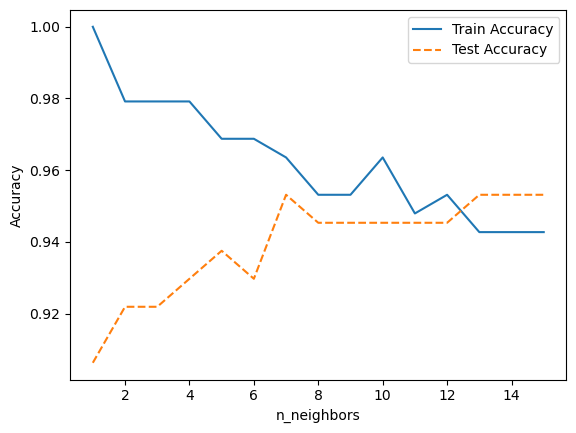

In [13]:
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("n_neighbors")
plt.legend()
# 이웃이 증가할 수록 train의 정확도는 감소하고 test의 정확도는 높아지고 있음
# 변화가 일어나는 구간이며 test의 정확도가 높은 7을 선택

In [14]:
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1,11)]*2

para_weights = (["uniform"]) * 10 + (["distance"]*10)
# uniform 가중치 설정은 모든 이웃 데이터 포인트에 동일한 가중치를 부여하는 방식
# distance 가중치 설정은 가까운 이웃 데이터 포인트일수록 더 큰 가중치를 부여하는 방식

for (v_n_neighbors,v_weights)in zip(para_n_neighbors,para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
    
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy

df_accuracy_weights.round(3)

# train이 1이되버리면 과대적합이 의심되니 적당히 test의 정확도도 높은 neighbors의 개수는 7개이며 가중치는 uniform을 선택한다.

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.906
1,2,uniform,0.979,0.922
2,3,uniform,0.979,0.922
3,4,uniform,0.979,0.930
4,5,uniform,0.969,0.938
5,6,uniform,0.969,0.930
6,7,uniform,0.964,0.953
7,8,uniform,0.953,0.945
8,9,uniform,0.953,0.945
9,10,uniform,0.964,0.945


In [15]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors", columns = "Weights",
                                                     values = ["TrainAccuracy","TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.906250  0.906250
2                   1.0  0.979167     0.906250  0.921875
3                   1.0  0.979167     0.921875  0.921875
4                   1.0  0.979167     0.937500  0.929688
5                   1.0  0.968750     0.937500  0.937500
6                   1.0  0.968750     0.953125  0.929688
7                   1.0  0.963542     0.953125  0.953125
8                   1.0  0.953125     0.945312  0.945312
9                   1.0  0.953125     0.945312  0.945312
10                  1.0  0.963542     0.953125  0.945312

In [16]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.906250,0.906250
2,1.0,0.979167,0.906250,0.921875
3,1.0,0.979167,0.921875,0.921875
4,1.0,0.979167,0.937500,0.929688
5,1.0,0.968750,0.937500,0.937500


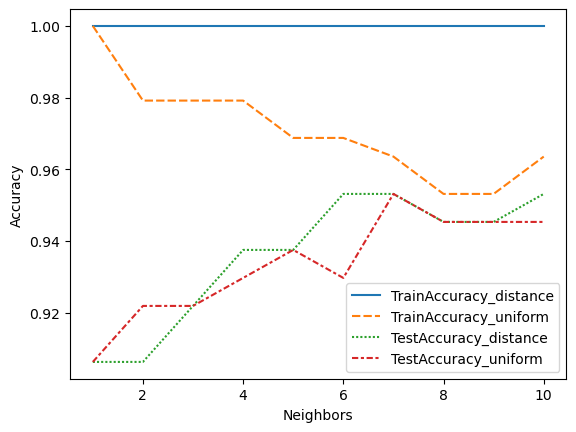

In [17]:
sns.lineplot(data = df_accuracy_weights_pivot)
plt.ylabel("Accuracy");

In [20]:
knn_model = KNeighborsClassifier(n_neighbors = 7, weights = "uniform", metric = "euclidean")
knn_model.fit(df_train_x, df_train_y)
y_pred = knn_model.predict(df_test_x)
print("train data accuracy : {0:.3f}". format(knn_model.score(df_test_x,df_test_y)))
print("test data accuracy : {0:.3f}". format(knn_model.score(df_test_x,df_test_y)))
print("Confusion matrix :\n{}". format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits =3))
# 이웃개수는 7개, uniform을 선택하여 동일하게 가중치를 주었고 euclidean 측정방식을 선택하였다.
# 정확도는 0.953으로 괜찮은 성능을 보여주고 있다.
# 음성은 83개중 80개를 맞추었고 양성같은 경우 총 45개 중 42개를 맞추었다.

train data accuracy : 0.953
test data accuracy : 0.953
Confusion matrix :
[[80  3]
 [ 3 42]]
              precision    recall  f1-score   support

           0      0.964     0.964     0.964        83
           1      0.933     0.933     0.933        45

    accuracy                          0.953       128
   macro avg      0.949     0.949     0.949       128
weighted avg      0.953     0.953     0.953       128

